## <span style="background-color:brown;color:black;"><strong>Marketing Strategy Analysis</strong></span>
#### <span style="background-color:brown;color:black;"><b>Programming Script and Technical Report</b></span>

<a href="https://www.linkedin.com/in/okinoleiba">LinkedIn: Okino Kamali Leiba</a>


<img src="https://jupyter.org//assets/homepage/main-logo.svg" width="477" height="286" alt="jupyter logo" loading="eager" float="left">


### <span style="background-color:brown;color:black"><b>Table of Content</b></span>
<code style="background-color:brown;">
<ol>
<li>Introduction</li>
<li>Data Loading and Quality Check</li> 
<li>Exploratory Data Analysis</li>
<li>Feature Additions and Engineering</li>
<li>Statistical Analysis</li>
<li>Final Recommendations <small>(Optimal Sales and Marketing Strategy)</small></li>
</ol>
</code>



### <span style="background-color:brown;color:black"><strong><b>1. Introduction</b></strong></span>

<code style="background-color:brown;">
<ul>
<li>What is the impact of each marketing strategy and sales visit on Sales <small>(Amount Collected)</small>?</li>
<li>Is the same strategy valid for all the different Client Types?</li>
</ul>
</code>


<span style="background-color:brown;color:black;"><b>Imports</b></span><br>
<code style="background-color:brown;">
<ul>
<li>Sys module gives access to variables and functions used or maintained by the interpreter</li>
<li>Pandas has data analysis and manipulation libraries</li>
<li>Numpy for general array computations</li>
<li>Matplotlib contains libraries for creating static, animated, and interactive visualizations in Python</li>
<li>Seaborn for Python data visualization based on Matplotlib</li>
<li>Scipy provides algorithms for scientific computing in Python</li>
</ul>
</code>

#### <span style="background-color:brown;color:black;"><b>2. Data Loading and Quality Checks</b></span>

In [1]:

#import modules
import sys, pandas as pd, matplotlib as ml, seaborn as sns, numpy as np, scipy.stats


In [2]:
file_path = 'C:/Users/Owner/source/vsc_repo/marketing_prog_cookbook/campaign-data.csv'
campaign_data = pd.read_csv(file_path, sep=",", header=0, engine="c", nrows=2979, keep_default_na=True, 
encoding="utf-8")
campaign_data.columns
 

Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition'],
      dtype='object')

### <span style="background-color:brown;color:black;"><b>3. Exploratory Data Analysis</b></span>

<span style="background-color:brown;color:black;"><b>3.1 Exploring and Understanding the Basics Data</b></span>
<code style="background-color:brown;">
<ol>
<li>General Review and Exploration</li> 
<li>Distribution of Data Across Different Accounts</li> 
<li>Difference of Sales in Account Types <small>(Using Categorical Mean)</small></li> 
<li>Statistical Summary</li> 
</ol>
</code>

In [3]:
#data exploration no visualization
#Target/Regressand/Dependent Variable: Amount Collected
#Regressor/Predictors/Indpendent Variables: Campaign (Email), Campaign (Flyer), Campaign (Phone), Sales Contact 1, Sales Contact 2,
#Sales Contact 3, Sales Contact 4, Sales Contact 5
campaign_data.head(6)


,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
5,ID-987275,Medium Facility,2800,125,1003,16-06-2014,27275684,198,0.0,0.0,0.0,0.0,4515000.0,322500.0,0.0,0.0,Low


In [4]:

#data exploration no visualization
campaign_data.tail(6)


,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
2970,ID-987463,Small Facility,800,20,1003,17-07-2015,0,0,0.0,527463.8,0.0,0.0,0.0,1290000.0,0.0,0.0,Low
2971,ID-987463,Small Facility,800,20,1003,16-08-2015,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
2972,ID-987463,Small Facility,800,20,1003,16-09-2015,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High
2973,ID-987463,Small Facility,800,20,1003,16-10-2015,0,0,0.0,0.0,0.0,0.0,0.0,2580000.0,0.0,0.0,High
2974,ID-987463,Small Facility,800,20,1003,16-11-2015,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High
2975,ID-987463,Small Facility,800,20,1003,17-12-2015,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High


In [5]:
#data exploration no visualization
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 17 columns):
Client ID                2976 non-null object
Client Type              2976 non-null object
Number of Customers      2976 non-null int64
Montly Target            2976 non-null int64
Zip Code                 2976 non-null int64
Calendardate             2976 non-null object
Amount Collected         2976 non-null int64
Unit Sold                2976 non-null int64
Campaign (Email)         2976 non-null float64
Campaign (Flyer)         2976 non-null float64
Campaign (Phone)         2976 non-null float64
Sales Contact 1          2976 non-null float64
Sales Contact 2          2976 non-null float64
Sales Contact 3          2976 non-null float64
Sales Contact 4          2976 non-null float64
Sales Contact 5          2976 non-null float64
Number of Competition    2976 non-null object
dtypes: float64(8), int64(5), object(4)
memory usage: 395.3+ KB


In [6]:
#data exploration no visualization
#take note of Campign (Flyer) and Sales Contact 2
campaign_data[['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition']].describe().round(decimals=2)

,Number of Customers,Montly Target,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5
count,2976.00,2976.00,2.976000e+03,2976.00,2976.00,2976.00,2976.00,2976.00,2976.00,2976.00,2976.00,2976.00
mean,1456.94,75.08,1.700440e+07,121.46,143284.96,685418.60,29777.43,131340.73,2023319.05,1867487.40,70763.61,14629.54
std,1669.85,87.04,3.025803e+07,216.41,723045.16,1727587.37,383213.36,1034882.27,3396991.00,3271348.58,386987.24,89059.55
min,0.00,5.00,-2.216150e+07,-63.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,240.00,10.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,960.00,47.50,3.409460e+06,24.00,0.00,0.00,0.00,0.00,645000.00,322500.00,0.00,0.00
75%,2090.00,101.25,2.045676e+07,147.00,0.00,81482.85,0.00,0.00,2580000.00,2580000.00,0.00,0.00
max,9840.00,510.00,2.079771e+08,1500.00,11446733.30,13593951.20,9617380.00,29025000.00,30637500.00,26122500.00,4837500.00,1612500.00


In [7]:
#clean data
##modified base dataset: rename columns and changed axis: 1##
campaign_data.dropna(axis=0,how="any",)
campaign_data.duplicated(keep="first")
campaign_data.groupby('Client Type')
campaign_data = campaign_data.rename({'Montly Target':'Monthly Target','Calendardate':'Calender Date','Campaign (Email)':'Marketing Channel\
       (Email)','Campaign (Flyer)':'Marketing Channel(Flyer)', 'Campaign (Phone)':'Marketing Channel(Phone)','Number of Competition':'Level\
        of Competition'},
 axis=1,inplace=False)
#campaign_data = campaign_data.replace({'Montly Target':'Monthly Target','Calendardate':'Calender Date','Campaign (Email)':'Marketing Channel(Email)',
#'Campaign (Flyer)':'Marketing Channel(Flyer)', 'Campaign (Phone)':'Marketing Channel(Phone)','Number of Competition':'Level of Competition'}, inplace=False)
campaign_data = campaign_data.set_axis(['Client ID', 'Client Type', 'Number of Customers', 'Monthly Target',
       'Zip Code', 'Calendar Date', 'Amount Collected', 'Unit Sold',
       'Marketing Channel(Email)', 'Marketing Channel(Flyer)', 'Marketing Channel(Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Level of Competition'], axis=1, inplace=False)
campaign_data.head(0)



,Client ID,Client Type,Number of Customers,Monthly Target,Zip Code,Calendar Date,Amount Collected,Unit Sold,Marketing Channel(Email),Marketing Channel(Flyer),Marketing Channel(Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Level of Competition


#### <span style="background-color:brown;color:black;"><b>4. Feature Additions and Engineering</b></span>

In [8]:
#additional date features 
##modified base dataset: added new columns##
campaign_data["Calendar Date"]=pd.to_datetime(campaign_data["Calendar Date"],errors="raise",dayfirst=True,yearfirst=True)
campaign_data["Calendar_Month"]=campaign_data["Calendar Date"].dt.month
campaign_data["Calendar_Year"]=campaign_data["Calendar Date"].dt.year



### <span style="background-color:brown;color:black;"><b>5. Statistical Analysis</b></span>

<span style="background-color:brown;color:black;"><b>5.1 Statistical Analysis - Answering the Questions</b></span>
<code styel="background-color:brown;">
<ol>
<li>Impact of Marketing Strategy on Sales <small>(Using Correlation and Linear Regression)</small></li>
<li>Impact of Competition on Sales</li>
<li>How Different Types of Client Can Have Different Strategies <small>(Catorgize Question 1 and Question 2 Based on Account Type)</small></li>
</ol>
</code>

<span style="background-color:brown;color:black;"><b>5.2 Impact of Marketing Strategy on Sales<b></span>

<span style="background-color:brown;color:black;"><b>Understanding of Distrubtions</b></span>

In [9]:
campaign_data["Client Type"].value_counts(normalize=True,sort=True,ascending=True).round(decimals=2)

Private Facility    0.09
Medium Facility     0.17
Small Facility      0.28
Large Facility      0.46
Name: Client Type, dtype: float64

In [10]:
pd.crosstab(campaign_data["Level of Competition"], campaign_data["Client Type"],margins=True, normalize="columns").round(decimals=2)

Client Type,Large Facility,Medium Facility,Private Facility,Small Facility,All
Level of Competition,,,,,
High,0.17,0.17,0.17,0.17,0.17
Low,0.83,0.83,0.83,0.83,0.83


In [11]:
campaign_data[['Client ID', 'Client Type', 'Number of Customers', 'Monthly Target',
       'Calendar Date', 'Amount Collected', 'Unit Sold',
       'Marketing Channel(Email)', 'Marketing Channel(Flyer)', 'Marketing Channel(Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Level of Competition']].groupby("Level of Competition",).mean().round(decimals=2)

,Number of Customers,Monthly Target,Amount Collected,Unit Sold,Marketing Channel(Email),Marketing Channel(Flyer),Marketing Channel(Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5
Level of Competition,,,,,,,,,,,,
High,1456.94,75.08,29747888.39,213.13,105398.94,994046.72,45198.04,146945.56,2685332.66,1786754.03,72172.38,8452.62
Low,1456.94,75.08,14455700.99,103.13,150862.17,623692.98,26693.30,128219.76,1890916.33,1883634.07,70481.85,15864.92


In [12]:
campaign_data[['Client Type', 'Number of Customers', 'Monthly Target',
       'Calendar Date', 'Amount Collected', 'Unit Sold',
       'Marketing Channel(Email)', 'Marketing Channel(Flyer)', 'Marketing Channel(Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5']].groupby("Client Type").mean().round(2)

,Number of Customers,Monthly Target,Amount Collected,Unit Sold,Marketing Channel(Email),Marketing Channel(Flyer),Marketing Channel(Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5
Client Type,,,,,,,,,,,,
Large Facility,1380.84,71.58,19998804.93,143.10,142273.61,819205.63,45595.44,133667.76,2034013.16,2017039.47,119287.28,16266.45
Medium Facility,3940.76,202.86,40759967.67,290.58,437217.10,1552603.27,49176.85,398645.83,4822782.74,4698645.83,85104.17,33273.81
Private Facility,400.73,20.45,5030245.94,35.78,5183.72,227291.88,5522.47,1221.59,637670.45,443437.50,3664.77,12215.91
Small Facility,422.51,21.29,1637758.72,11.69,11975.99,91208.75,0.00,8062.50,761714.29,372794.64,4223.21,1535.71


In [13]:
campaign_data[['Number of Customers', 'Monthly Target',
       'Calendar Date', 'Amount Collected', 'Unit Sold',
       'Marketing Channel(Email)', 'Marketing Channel(Flyer)', 'Marketing Channel(Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5']].std().round(decimals=3)

Number of Customers         1.669849e+03
Monthly Target              8.704200e+01
Amount Collected            3.025803e+07
Unit Sold                   2.164140e+02
Marketing Channel(Email)    7.230452e+05
Marketing Channel(Flyer)    1.727587e+06
Marketing Channel(Phone)    3.832134e+05
Sales Contact 1             1.034882e+06
Sales Contact 2             3.396991e+06
Sales Contact 3             3.271349e+06
Sales Contact 4             3.869872e+05
Sales Contact 5             8.905955e+04
dtype: float64

In [14]:
campaign_data[['Number of Customers', 'Monthly Target',
       'Calendar Date', 'Amount Collected', 'Unit Sold',
       'Marketing Channel(Email)', 'Marketing Channel(Flyer)', 'Marketing Channel(Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5']].var().round(decimals=3)

Number of Customers         2.788395e+06
Monthly Target              7.576330e+03
Amount Collected            9.155484e+14
Unit Sold                   4.683501e+04
Marketing Channel(Email)    5.227943e+11
Marketing Channel(Flyer)    2.984558e+12
Marketing Channel(Phone)    1.468525e+11
Sales Contact 1             1.070981e+12
Sales Contact 2             1.153955e+13
Sales Contact 3             1.070172e+13
Sales Contact 4             1.497591e+11
Sales Contact 5             7.931604e+09
dtype: float64

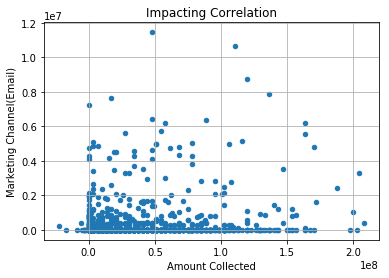

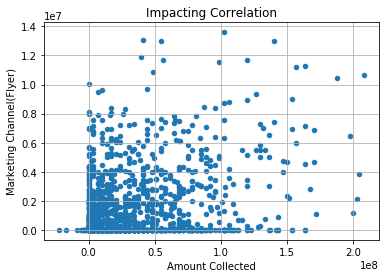

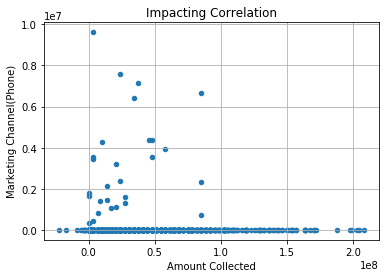

In [15]:
campaign_data.plot(x="Amount Collected", y="Marketing Channel(Email)",kind="scatter",legend=True,title="Impacting Correlation",grid=True)
campaign_data.plot(x="Amount Collected", y="Marketing Channel(Flyer)",kind="scatter",legend=True,title="Impacting Correlation",grid=True)
campaign_data.plot(x="Amount Collected", y="Marketing Channel(Phone)",kind="scatter",legend=True,title="Impacting Correlation",grid=True)

 

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

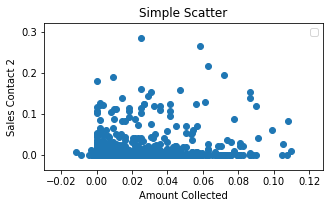

In [16]:
#strong correlation between Amount Collected and Sales Contact 2
from sklearn import preprocessing

x = np.array([element for element in campaign_data["Amount Collected"]]) #numpy arrary
y = np.array([element for element in campaign_data["Marketing Channel(Email)"]])
normalize_x = preprocessing.normalize([x] )#normalize data
normalize_y = preprocessing.normalize([y])
fig = ml.pyplot.figure() #matplotlab plot
fig, campaign_plot = ml.pyplot.subplots(figsize=(5, 2.7))
campaign_plot.scatter(normalize_x, normalize_y)
campaign_plot.set_xlabel("Amount Collected")
campaign_plot.set_ylabel("Sales Contact 2")
campaign_plot.set_title("Simple Scatter")
campaign_plot.legend(); 


# X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
# Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)
# co = campaign_plot[0,1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
# fig.colorbar(co, ax=campaign_plot[0, 1])




In [17]:
corr_data = campaign_data.corr("pearson")[["Amount Collected"]].dropna(axis=0, how="any")
corr_data.round(decimals=2)

,Amount Collected
Number of Customers,0.61
Monthly Target,0.61
Amount Collected,1.00
Unit Sold,1.00
Marketing Channel(Email),0.25
Marketing Channel(Flyer),0.44
Marketing Channel(Phone),0.03
Sales Contact 1,0.28
Sales Contact 2,0.55
Sales Contact 3,0.36


<span style="background-color:brown;color:black;"><b>Correlation Analysis</b></span>

In [18]:
#consolidated strategy for targeting
import seaborn as sns, pandas as pd
correlation_data = pd.DataFrame(campaign_data[["Amount Collected","Marketing Channel(Email)","Marketing Channel(Flyer)","Marketing Channel(Phone)","Sales Contact 1",
"Sales Contact 2","Sales Contact 3","Sales Contact 4","Sales Contact 5"]].corr("pearson")["Amount Collected"]).reset_index()
correlation_data.columns = ["Impacting Variable", "Degree of Linear Impact (Correlation)"]
correlation_data = correlation_data[correlation_data["Impacting Variable"] != "Amount Collected"]
correlation_data = correlation_data.sort_values("Degree of Linear Impact (Correlation)", axis=0,ascending=False,kind="quicksort",inplace=False,
na_position="first")
correlation_data.style.background_gradient(cmap=sns.light_palette("brown",n_colors=2,reverse=False,as_cmap=True)).set_precision(2)
#correlation_data.io.Styler.background_color().set_precision(2)

,Impacting Variable,Degree of Linear Impact (Correlation)
5,Sales Contact 2,0.55
2,Marketing Channel(Flyer),0.44
6,Sales Contact 3,0.36
4,Sales Contact 1,0.28
1,Marketing Channel(Email),0.25
7,Sales Contact 4,0.24
8,Sales Contact 5,0.096
3,Marketing Channel(Phone),0.035


In [19]:
import seaborn as sns, pandas as pd
correlation_data = pd.DataFrame(campaign_data.groupby("Client Type")[["Amount Collected","Marketing Channel(Email)","Marketing Channel(Flyer)","Marketing Channel(Phone)",
"Sales Contact 1","Sales Contact 2","Sales Contact 3","Sales Contact 4", "Sales Contact 5"]].corr("pearson")["Amount Collected"]).reset_index()
correlation_data = correlation_data.sort_values(["Client Type", "Amount Collected"],axis=0,ascending=False,kind="quicksort",na_position="first",inplace=False)
correlation_data.columns=["Account Type", "Variable Impact on Sales", "Impact"]
correlation_data = correlation_data[correlation_data["Variable Impact on Sales"] != "Amount Collected"].reset_index(drop=True)
correlation_data.style.background_gradient(cmap=sns.light_palette("purple",n_colors=4,reverse=False,as_cmap=True)).set_precision(2)



c:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Account Type,Variable Impact on Sales,Impact
0,Small Facility,Marketing Channel(Phone),nan
1,Small Facility,Sales Contact 2,0.22
2,Small Facility,Sales Contact 3,0.068
3,Small Facility,Marketing Channel(Email),0.06
4,Small Facility,Marketing Channel(Flyer),0.041
5,Small Facility,Sales Contact 4,0.024
6,Small Facility,Sales Contact 5,0.00093
7,Small Facility,Sales Contact 1,-0.016
8,Private Facility,Sales Contact 2,0.57
9,Private Facility,Marketing Channel(Flyer),0.28


<span style="background-color:brown;color:black;"><b>Market Strategy Impact on Sales <small>(Categorized by Different Account Type)</small></b></span>

In [20]:
##modified base dataset: renamed columns##
import statsmodels.api as sm, statsmodels.formula.api as smf
campaign_data.columns=[mystring.replace(" ", "_") for mystring in campaign_data.columns]
campaign_data.columns=[mystring.replace("(", "_") for mystring in campaign_data.columns]
campaign_data.columns=[mystring.replace(")", "") for mystring in campaign_data.columns]
results = smf.ols('Amount_Collected ~ Marketing_Channel_Email + Marketing_Channel_Flyer + Marketing_Channel_Phone + Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4\
        + Sales_Contact_5',data=campaign_data, missing="raise", hasconst=False).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     504.4
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:57:24   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

In [21]:
html_frame = pd.read_html(results.summary().tables[1].as_html(),flavor="bs4",encoding=None,header=0,index_col=0)[0]

In [22]:
html_frame = html_frame.reset_index()
html_frame = html_frame[html_frame["P>|t|"] < 0.05][["index","coef"]]
#campaign_data.rename(columns={"index":"Index","coef":"Coef"})
html_frame

,index,coef
0,Intercept,1.481000e+06
2,Marketing_Channel_Flyer,3.337600e+00
4,Sales_Contact_1,4.236800e+00
5,Sales_Contact_2,3.638200e+00
6,Sales_Contact_3,2.343200e+00
7,Sales_Contact_4,1.094780e+01


<span style="background-color:brown;color:black;"><b>Regression Analysis <small>(Market Sales and Strategies - Cateforized for Different Account Types)</small></b></span>

In [23]:
consolidated_summary=pd.DataFrame()
for acctype in list(set(list(campaign_data["Client_Type"]))):
    temp_data = campaign_data[campaign_data["Client_Type"]==acctype].copy(deep=False)
    results = smf.ols('Amount_Collected ~ Marketing_Channel_Email + Marketing_Channel_Flyer + Marketing_Channel_Phone\
         + Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4\
        + Sales_Contact_5',data=temp_data, missing="raise", hasconst=False).fit()
    consolidated_frame = pd.read_html(results.summary().tables[1].as_html(),flavor="bs4",encoding=None,
    header=0,index_col=0)[0].reset_index()
    consolidated_frame = consolidated_frame[consolidated_frame["P>|t|"] < 0.05][["index","coef"]]
    consolidated_frame.columns=["Variable", "Coefficient (Impact)"]
    consolidated_frame["Account Type"] = acctype
    consolidated_frame = consolidated_frame.sort_values("Coefficient (Impact)", ascending=False, 
    kind="quicksort", inplace=False,na_position="first",axis=0)
    consolidated_frame = consolidated_frame[consolidated_frame["Variable"] != "Intercept"]
    print(acctype)
    consolidated_summary = consolidated_summary.append(consolidated_frame)
    print(consolidated_frame)
    



Private Facility
          Variable  Coefficient (Impact)      Account Type
5  Sales_Contact_2                6.6223  Private Facility
Medium Facility
                  Variable  Coefficient (Impact)     Account Type
2  Marketing_Channel_Flyer                4.1059  Medium Facility
5          Sales_Contact_2                3.5778  Medium Facility
4          Sales_Contact_1                3.1365  Medium Facility
6          Sales_Contact_3                2.1174  Medium Facility
Large Facility 
                  Variable  Coefficient (Impact)     Account Type
4          Sales_Contact_1               11.6731  Large Facility 
7          Sales_Contact_4               10.6145  Large Facility 
5          Sales_Contact_2                4.0031  Large Facility 
2  Marketing_Channel_Flyer                2.7204  Large Facility 
6          Sales_Contact_3                2.0316  Large Facility 
3  Marketing_Channel_Phone               -3.5361  Large Facility 
Small Facility 
                  Variabl

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

consolidated_summary=pd.DataFrame()
for acctype in list(set(list(campaign_data["Client_Type"]))):
    temp_data = campaign_data[campaign_data["Client_Type"]==acctype].copy(deep=False)
    results = smf.ols('Amount_Collected ~ Marketing_Channel_Email + Marketing_Channel_Flyer + Marketing_Channel_Phone\
         + Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4\
        + Sales_Contact_5',data=temp_data, missing="raise", hasconst=False).fit()
    consolidated_frame = pd.read_html(results.summary().tables[1].as_html(),flavor="bs4",encoding=None,
    header=0,index_col=0)[0].reset_index()
    consolidated_frame = consolidated_frame[consolidated_frame["P>|t|"] < 0.05][["index","coef"]]
    consolidated_frame.columns=["Variable", "Coefficient (Impact)"]
    consolidated_frame["Account Type"] = acctype
    consolidated_frame = consolidated_frame.sort_values("Coefficient (Impact)", ascending=False, 
    kind="quicksort", inplace=False,na_position="first",axis=0)
    consolidated_frame = consolidated_frame[consolidated_frame["Variable"] != "Intercept"]
    print(acctype)
    consolidated_summary = consolidated_summary.append(consolidated_frame)
    print(results.summary())

Private Facility
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     21.12
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           1.65e-26
Time:                        00:57:57   Log-Likelihood:                -4650.8
No. Observations:                 264   AIC:                             9320.
Df Residuals:                     255   BIC:                             9352.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept

### <span style="background-color:brown;color:black;"><b>6. Final Recommendations</b></span>

<span style="background-color:brown;color:black;">
Using the table below we can use the coefficient to see how much return we can derive from each dollar we spend, here we can clearly see that for different Account Types and different Campaigns and different Sales Contact are effective for each type of facility<br><br>

<span style="background-color:brown;color:black;">
<b>Case Explanation - Small Facility</b><br>
Small Facility achieved more impact and value on the dollar on average with Sales Contact 2. Despite the weakness in other marketing channels Small Facility is able to offset the gain in returns with Sales Contact 2. It may be advisable to conduct further inward education by developing a comprehensive marketing research plan to determine the factors contributes to the significant losses in the Marketing Channel Phone.
</span><br><br>

<span style="background-color:brown;color:black;">
<b>Case Explanation - Medium Facility </b><br>
Case Explanation - Medium Facility 
Medium Facility shows decent results with Flyer Campaigns with each dollar spent and a return of four dollars on average. Sales Contact 2 is highly effective followed by Sales Contact 1 and Sales Contact 3. All other marketing strategies shows no significant impact on return on investment and further marketing research may be warranted to determine where improvements can be made or to determine whether to dissolve the other marketing channels.
</span><br><br>

<span style="background-color:brown;color:black;">
<b>Case Explanation - Large Facility </b><br>
Large Facility had no comparative, with the other type of facilities, and significant impact on all of its marketing channels. There is no significant data to determine whether the size of the facility or the availability of resources is a factor for return on investment based on the marketing channel. It is reasonable to assume that there is some segmentation of our target audience based on the size and type of the facility. Additional data would be necessary to determine if there is a correlation between return on investment and the segmentation of the market based on the size and type of the facility.
</span>


In [25]:
consolidated_summary

,Variable,Coefficient (Impact),Account Type
5,Sales_Contact_2,6.622300e+00,Private Facility
2,Marketing_Channel_Flyer,4.105900e+00,Medium Facility
5,Sales_Contact_2,3.577800e+00,Medium Facility
4,Sales_Contact_1,3.136500e+00,Medium Facility
6,Sales_Contact_3,2.117400e+00,Medium Facility
4,Sales_Contact_1,1.167310e+01,Large Facility
7,Sales_Contact_4,1.061450e+01,Large Facility
5,Sales_Contact_2,4.003100e+00,Large Facility
2,Marketing_Channel_Flyer,2.720400e+00,Large Facility
6,Sales_Contact_3,2.031600e+00,Large Facility


In [26]:
consolidated_summary.reset_index(inplace=True,drop=False)
consolidated_summary.drop("index",axis=1,inplace=True)
consolidated_summary["Coefficient (Impact)"] = consolidated_summary["Coefficient (Impact)"].apply(lambda x: round(x,2))
#consolidated_summary.rename({"Coefficient (Impact":"Return on Investment"})
consolidated_summary

,Variable,Coefficient (Impact),Account Type
0,Sales_Contact_2,6.62,Private Facility
1,Marketing_Channel_Flyer,4.11,Medium Facility
2,Sales_Contact_2,3.58,Medium Facility
3,Sales_Contact_1,3.14,Medium Facility
4,Sales_Contact_3,2.12,Medium Facility
5,Sales_Contact_1,11.67,Large Facility
6,Sales_Contact_4,10.61,Large Facility
7,Sales_Contact_2,4.00,Large Facility
8,Marketing_Channel_Flyer,2.72,Large Facility
9,Sales_Contact_3,2.03,Large Facility


In [27]:
import matplotlib

In [28]:
consolidated_summary.columns = ["Variable", "Return on Investment", "Account Type"]
consolidated_summary["Return on Investment"] = consolidated_summary["Return on Investment"].apply(lambda x: round(x,2))
consolidated_summary.style.background_gradient(cmap="gist_rainbow")

,Variable,Return on Investment,Account Type
0,Sales_Contact_2,6.62,Private Facility
1,Marketing_Channel_Flyer,4.11,Medium Facility
2,Sales_Contact_2,3.58,Medium Facility
3,Sales_Contact_1,3.14,Medium Facility
4,Sales_Contact_3,2.12,Medium Facility
5,Sales_Contact_1,11.67,Large Facility
6,Sales_Contact_4,10.61,Large Facility
7,Sales_Contact_2,4,Large Facility
8,Marketing_Channel_Flyer,2.72,Large Facility
9,Sales_Contact_3,2.03,Large Facility


In [29]:
def format(x):
    return "${:.2f}".format(x)
consolidated_summary["Return on Investment"] = consolidated_summary["Return on Investment"].apply(format)


In [30]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
consolidated_dataframe = pd.DataFrame(consolidated_summary)
consolidated_dataframe.style.background_gradient(cmap='RdYlGn')

# consolidated_summary.columns = ["Variable", "Return on Investment", "Account Type"]
# consolidated_dataframe = pd.DataFrame(consolidated_summary)
# consolidated_dataframe.style.background_gradient(cmap="YlOrRd")
# consolidated_dataframe["Return on Investment"].style.background_gradient(cmap="gist_rainbow")



,Variable,Return on Investment,Account Type
0,Sales_Contact_2,$6.62,Private Facility
1,Marketing_Channel_Flyer,$4.11,Medium Facility
2,Sales_Contact_2,$3.58,Medium Facility
3,Sales_Contact_1,$3.14,Medium Facility
4,Sales_Contact_3,$2.12,Medium Facility
5,Sales_Contact_1,$11.67,Large Facility
6,Sales_Contact_4,$10.61,Large Facility
7,Sales_Contact_2,$4.00,Large Facility
8,Marketing_Channel_Flyer,$2.72,Large Facility
9,Sales_Contact_3,$2.03,Large Facility


In [31]:
consolidated_summary.to_csv("okl_consolidated_summary.csv",mode="w",encoding="utf-8")
open("okl_consolidated_summary.csv")

<_io.TextIOWrapper name='okl_consolidated_summary.csv' mode='r' encoding='cp1252'>